In [1]:
from pyimagesearch import config
from pyimagesearch import utils
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import tensorflow
import tensorflow as tf
import csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

def prediction(anchors, testing):
    
    tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
    interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
    preds = []
    for test in testing:
        out_preds = []
        for anchor in anchors:        
            interpreter.allocate_tensors()
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()
            pair_1_dim = np.array([anchor])
            pair_2_dim = np.array([test])
            interpreter.set_tensor(input_details[0]['index'], pair_1_dim)
            interpreter.set_tensor(input_details[1]['index'], pair_2_dim)
            interpreter.invoke()
            tflite_results = interpreter.get_tensor(output_details[0]['index'])
            out_preds.append(tflite_results)
        gg = np.argmax(out_preds)
        #print(out_preds)
        #print(gg)
        preds.append(gg)
        predictions = np.array(preds)
    return predictions




In [6]:
#anchors_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\anchors.csv"
anchors_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\cm\anchors3.csv"
#test_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\cm\test3.csv"
test_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\online.csv"
anchors = np.loadtxt(anchors_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

testing = np.loadtxt(test_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
predictions = prediction(anchors, testing)
print(output)

[12 10 10 10 11 10 10 10 10 10 10 10 10 11 11 11 12 11 11 11 11 11 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14
 14 14]


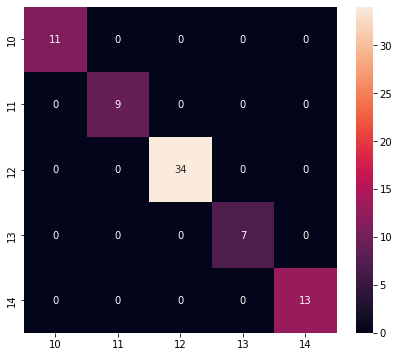

Classification Report
              precision    recall  f1-score   support

          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        13

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [7]:

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, predictions))

# Y_pred = model.predict(X_test)
# y_pred = np.argmax(Y_pred, axis=1)
y_true = np.loadtxt(test_path, delimiter=',', dtype='int32', usecols=(0))
print_confusion_matrix(y_true, predictions)